In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('1850-2025.csv')
df.shape
print(df.head())

     Date  Anomaly
0  185001    -0.45
1  185002    -0.20
2  185003    -0.21
3  185004    -0.35
4  185005    -0.29


In [41]:
# Convert 'Date' from int YYYYMM to datetime
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m')

# Display the first few rows to verify the conversion
print(df.head())

AnomalyData = df
AnomalyData.set_index('Date', inplace=True)


        Date  Anomaly
0 1850-01-01    -0.45
1 1850-02-01    -0.20
2 1850-03-01    -0.21
3 1850-04-01    -0.35
4 1850-05-01    -0.29


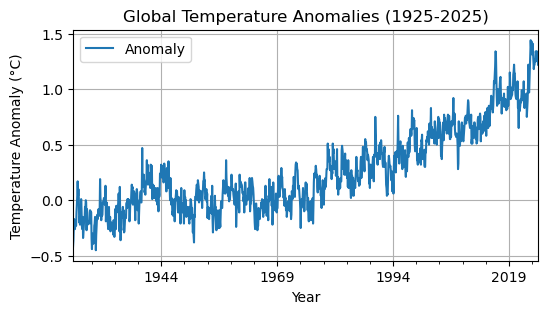

In [64]:
#group data of the last 100 years
century = AnomalyData.loc["1925-01-01":"2025-04-01"]
# Plotting the data
plot = century.plot(figsize=(6, 3), title='Global Temperature Anomalies (1925-2025)')
plt.xlabel('Year') 
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()


This is a plot of the global temoerature anomalies over the last century. 

What is a temperature anomaly? 

A temperature anomaly is the difference between an observed temperature and a base temperature which is usually a long term average.

In this line plot we see that there is a definite increase in the value of the anomalies over the past century. Its still quite hard to see if there are any trends in this data due to the yearly fluctuations. to solve this we will need to make a rolling mean plot. 

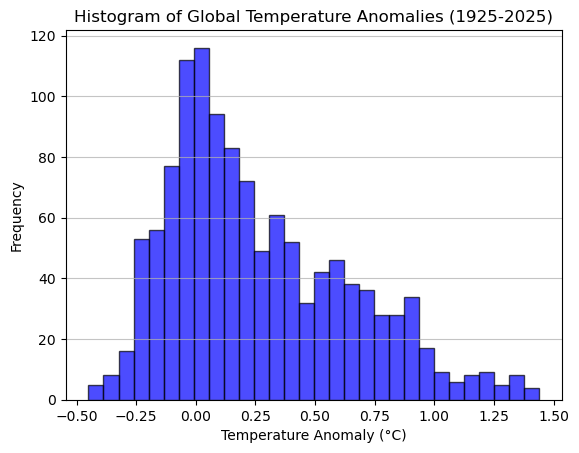

In [52]:
century['Anomaly'].plot(kind='hist', bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Global Temperature Anomalies (1925-2025)')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

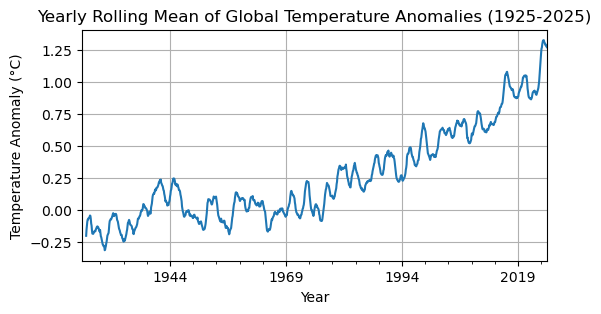

In [62]:
rolling_mean_year = century['Anomaly'].rolling(window=12).mean()
rolling_mean_year.plot(figsize=(6, 3), title='Yearly Rolling Mean of Global Temperature Anomalies (1925-2025)')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

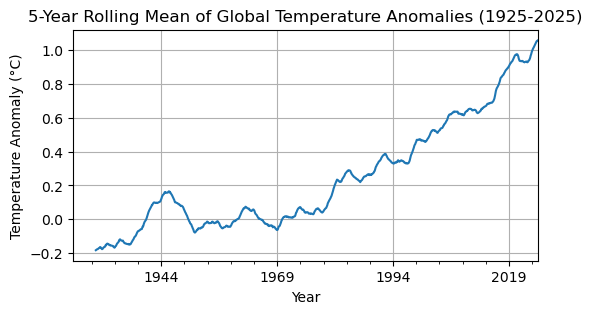

In [63]:
rolling_mean_5years = century['Anomaly'].rolling(window=60).mean()
rolling_mean_5years.plot(figsize=(6, 3), title='5-Year Rolling Mean of Global Temperature Anomalies (1925-2025)')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

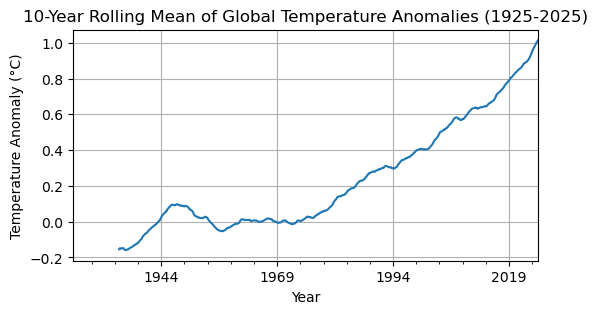

In [68]:
rolling_mean_10years = century['Anomaly'].rolling(window=120).mean()
rolling_mean_10years.plot(figsize=(6, 3), title='10-Year Rolling Mean of Global Temperature Anomalies (1925-2025)')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

In [ ]:
summary_stats = century.describe()
print("Summary Statistics of Global Temperature Anomalies (1925-2025):" + str(summary_stats.round(2)))

Summary Statistics of Global Temperature Anomalies (1925-2025):       Anomaly
count  1204.00
mean      0.26
std       0.38
min      -0.45
25%      -0.02
50%       0.17
75%       0.52
max       1.44
